<br>

***

## Glossary of Regression Terms

### Coefficients <span style="color: blue;">(*coef*)</span>

In the regression of a dataset, the coefficients describe the statistical relationship between the independent variables and the dependent variables.

The sign of the coefficent can tell you the direction of the relatioship between the variables. A positive sign identifies that as the independent variable increases, the mean of the dependent variable also increases, whilst a negative sign suggests a decrease.

The value of the coefficient describes how the mean of the dependent variable changes in relation to the independent variable.

Whilst carrying out regression on an indepedent variable and a dependent variable, it is important to hold the other variables 'constant'. That is to say it is imperative to study the effect of the independent variable on each dependent variable in isolation from the others (statisticsbyjim.com).

The coefficients of the output are estimates of the actual data population, therefore, it is important to ensure that the model for regression follows best practice for that particular type of regression.

<br>

***

### Coefficient of Determination <span style="color: blue;">*(R²)*</span>

#### <span style="color: green;">*High Percentage R² = Good fit; Low Percentage R² = Bad fit*</span>

R² is the percentage of the response variable variation of a linear model. It measures how close the data are fitted by a line of regression (Frost, Statistics By Jim).

R² is a valuable indicator for a Linear-regression model (including Polynomial models), however, it is important to check the test and training data of the model for signs of unwanted bias.


***

### Standard Error of the Coefficient  <span style="color: blue;">(*SE coef.* or *Std. Err.*)</span> and t-value  <span style="color: blue;">(*t*)</span>

#### <span style="color: green;">*Std. Err: Low Values = Good fit; High Values = Bad fit*</span>

#### <span style="color: brown;">*t-value: High Values = Good fit; Low Values = Bad fit*</span>

The Standard Error measures the accuracy of the unknown coefficient of the model. It is a floating point number that is always positive. The smaller the Std. Err. the more accurate the estimate is (Minitab.com). 

Dividing the coefficient by the standard error will produce a t-value or t-statistic. As a lower Std. Err. indicates lower error and the t-value calculates how many times the error divides into the coefficent itself, a larger t-value indicates greater accuracy. 

As a result, the t-value is essentially a measure of the error in relation to the coefficient.

***

### P-Values  <span style="color: blue;">(*p*)</span>, the Null Hypothesis <span style="color: blue;">(*H0*)</span> and the Significance Level  <span style="color: blue;">(*α* or *alpha level*)</span>   

#### <span style="color: green;">*Good Fit: when p-value* < *Significance Level*, and H0 is rejected </span>

P-values work together with Coefficients to indicate the statistical value produced in the Regression process. Specifically, the P-values *of* the coefficients identify whether the relationships observed in a sample exist throughout the population (StatisticsByJim). 

The p-value is a number between 0 and 1.

For each independent variable, there is a possibility that the variable has no correlation to the dependent variable, in which case there is not enough proof to display a relationship. This lack of a relationship is known as the Null Hypothesis and the P-values can test for this.

If it is first necessary to reject the Null Hypothesis in order to determine that there is a significant enough effect between the variables in your sample in order to conclude that the same effect is present in the wider population. The significance level is the probability of dismissing the Null Hypothesis when it in fact is evident.

The Significane Level, is a pre-determined threshold. It is normally set to a value of 0.05 (5%). However, the researcher must identify an appropriate threshold of Significance Level, from which to compare to the p-value. 

If the P-value is less than the significance level, the Null Hypothesis can be sufficiently rejected.

As the coefficients, P-values and the Significance level are determined for each variable in isolation, this can determine what variables should be included in the Regression analysis. 
    
The Significance Level for this project will be set at 5%.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import scikitlearn as sklearn

In [2]:
np.random.seed(0)

***
<br>

## Simple Linear Regression
<br>

### Create an array, 'a', between 0 and 100, with each point at an interval of 5 and create a second array, 'b', with each point a multiple of 'a' and some 'noise' added

In [3]:
a = np.arange(0, 20, 1)
b = 3 * a + np.random.normal(0.0, 2, a.size)

In [4]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [5]:
b

array([ 3.52810469,  3.80031442,  7.95747597, 13.4817864 , 15.73511598,
       13.04544424, 19.90017684, 20.69728558, 23.7935623 , 27.821197  ,
       30.28808714, 35.90854701, 37.52207545, 39.24335003, 42.88772647,
       45.66734865, 50.98815815, 50.58968347, 54.6261354 , 55.29180852])

### Plot 'a' and 'b' together

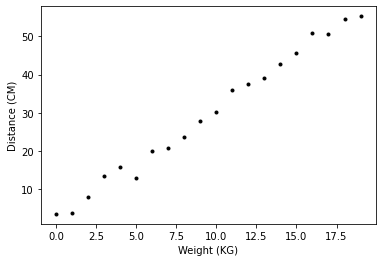

In [6]:
plt.plot(a, b, 'k.')

# Set some properties for the plot.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

### Plotting Lines that roughly fit the data

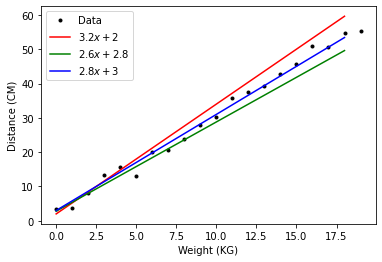

In [7]:
plt.plot(a, b, 'k.', label="Data")

x = np.arange(0.0, 20.0, 2.0)
plt.plot(x, 3.2 * x + 2.0, 'r-', label=r"$3.2x + 2$")
plt.plot(x, 2.6 * x +  2.8, 'g-', label=r"$2.6x + 2.8$")
plt.plot(x, 2.8 * x + 3.0, 'b-', label=r"$2.8x + 3$")

plt.legend()

plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

plt.show()

***
<br>

### Exponential and Linear Data
<br>

### Plotting 'd' and 'e' together

In [8]:
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [9]:
print(b)


[ 3.52810469  3.80031442  7.95747597 13.4817864  15.73511598 13.04544424
 19.90017684 20.69728558 23.7935623  27.821197   30.28808714 35.90854701
 37.52207545 39.24335003 42.88772647 45.66734865 50.98815815 50.58968347
 54.6261354  55.29180852]


[]

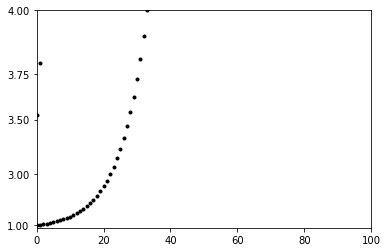

In [10]:
d = np.arange(0, 100, 1)
e = np.linspace(1, 10, 100)
f = 3 * e + np.random.exponential(3)

fig, ax = plt.subplots()
ax.plot(d, e, 'k.')
ax.plot(a, b, 'k.')

exp = lambda d: 4**(d)
log = lambda d: np.log(d)

# Set y scale to exponential
ax.set_yscale('function', functions=(exp, log))
ax.set(xlim=(0,100), ylim=(0,4))
ax.set_yticks([1, 3, 3.5, 3.75, 4.0])

plt.plot()

[]

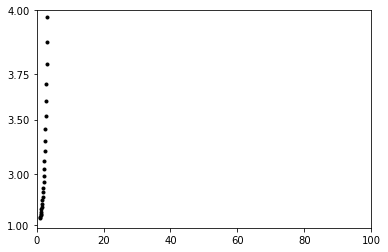

In [11]:
np.random.seed(0)
d = np.arange(0, 100, 1)
e = np.linspace(1, 10, 100)
f = e + np.random.exponential(1, size = None)

fig, ax = plt.subplots()
ax.plot(e, f, 'k.')

exp = lambda d: 4**(d)
log = lambda d: np.log(d)

# Set y scale to exponential
ax.set_yscale('function', functions=(exp, log))
ax.set(xlim=(0,100), ylim=(0,4))
ax.set_yticks([1, 3, 3.5, 3.75, 4.0])

plt.plot()

In [12]:
# Import curve fitting package from scipy
from scipy.optimize import curve_fit

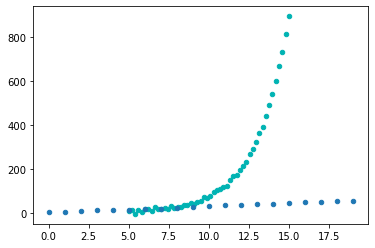

In [13]:
# Function to calculate the exponential with constants a and b
def exponential(x, a, b):
    return a*np.exp(b*x)

# Generate dummy dataset
x_dummy = np.linspace(start=5, stop=15, num=50)

# Calculate y-values based on dummy x-values
y_dummy = exponential(x_dummy, 0.5, 0.5)

# Add noise from a Gaussian distribution
noise = 5*np.random.normal(size=y_dummy.size)
y_dummy = y_dummy + noise

# Plot the noisy exponential data
plt.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data 2')
plt.scatter(a, b, s=20, label='Data 1')

#plt.scatter()

#### Reference: Fit Exponential Distribution with Noise: https://stats.stackexchange.com/questions/151606/fit-exponential-distribution-with-noise

#### Reference: Stackoverflow - 'How can I exponentially scale the Y axis?': https://stackoverflow.com/questions/26198260/how-can-i-exponentially-scale-the-y-axis-with-matplotlib

#### Reference: Curve Fitting (Towards Data Science): https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509

## Scikit-Learn Library Overview

### Classification

#### Classification Definition (Indicative.com)

Classification analysis is a data analysis task within data-mining, that identifies and assigns categories to a collection of data to allow for more accurate analysis. The classification method makes use of mathematical techniques such as decision trees, linear programming, neural network and statistics.

Classification analysis can be used to question, make a decision, or predict behavior through the use of an algorithm. It works by developing a set of training data which contains a certain set of attributes as well as the likely outcome. The job of the classification algorithm is to discover how that set of attributes reaches its conclusion.



#### Reference: https://www.nltk.org/api/nltk.classify.scikitlearn.html 

#### Reference: https://www.indicative.com/resource/classification-analysis/



***

### Regression

#### Explained (Achemer.com):

Regression analysis is a reliable method of identifying which variables have impact on a topic of interest. The process of performing a regression allows you to confidently determine which factors matter most, which factors can be ignored, and how these factors influence each other.

In order to understand regression analysis fully, it’s essential to comprehend the following terms:

Dependent Variable: This is the main factor that you’re trying to understand or predict. 
Independent Variables: These are the factors that you hypothesize have an impact on your dependent variable.

#### Reference: alchemer.com/resources/blog/regression-analysis/

***

### Clustering

#### Qualtrics.com:

Cluster analysis is a statistical method for processing data. It works by organising items into groups, or clusters, on the basis of how closely associated they are.

Cluster analysis, like reduced space analysis (factor analysis), is concerned with data matrices in which the variables have not been partitioned beforehand into criterion versus predictor subsets. The objective of cluster analysis is to find similar groups of subjects, where “similarity” between each pair of subjects means some global measure over the whole set of characteristics.

Cluster analysis is an unsupervised learning algorithm, meaning that you don’t know how many clusters exist in the data before running the model. Unlike many other statistical methods, cluster analysis is typically used when there is no assumption made about the likely relationships within the data. It provides information about where associations and patterns in data exist, but not what those might be or what they mean.

In this article, we discuss various methods of clustering and the key role that distance plays as measures of the proximity of pairs of points.

#### Reference: https://www.qualtrics.com/uk/experience-management/research/cluster-analysis/?rid=ip&prevsite=en&newsite=uk&geo=IE&geomatch=uk

***

### Dimensionality Reduction

##### Reference: https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/

Dimensionality reduction refers to techniques for reducing the number of input variables in training data.

When dealing with high dimensional data, it is often useful to reduce the dimensionality by projecting the data to a lower dimensional subspace which captures the “essence” of the data. This is called dimensionality reduction.

— Page 11, Machine Learning: A Probabilistic Perspective, 2012.

High-dimensionality might mean hundreds, thousands, or even millions of input variables.

Fewer input dimensions often mean correspondingly fewer parameters or a simpler structure in the machine learning model, referred to as degrees of freedom. A model with too many degrees of freedom is likely to overfit the training dataset and therefore may not perform well on new data.

It is desirable to have simple models that generalize well, and in turn, input data with few input variables. This is particularly true for linear models where the number of inputs and the degrees of freedom of the model are often closely related.

The fundamental reason for the curse of dimensionality is that high-dimensional functions have the potential to be much more complicated than low-dimensional ones, and that those complications are harder to discern. The only way to beat the curse is to incorporate knowledge about the data that is correct.

***

### Model Selection

A Gentle Introduction to Model Selection for Machine Learning
by Jason Brownlee on December 2, 2019 in Machine Learning Process
Tweet  Share
Given easy-to-use machine learning libraries like scikit-learn and Keras, it is straightforward to fit many different machine learning models on a given predictive modeling dataset.

The challenge of applied machine learning, therefore, becomes how to choose among a range of different models that you can use for your problem.

Naively, you might believe that model performance is sufficient, but should you consider other concerns, such as how long the model takes to train or how easy it is to explain to project stakeholders. Their concerns become more pressing if a chosen model must be used operationally for months or years.

Also, what are you choosing exactly: just the algorithm used to fit the model or the entire data preparation and model fitting pipeline?

In this post, you will discover the challenge of model selection for machine learning.

After reading this post, you will know:

Model selection is the process of choosing one among many candidate models for a predictive modeling problem.
There may be many competing concerns when performing model selection beyond model performance, such as complexity, maintainability, and available resources.
The two main classes of model selection techniques are probabilistic measures and resampling methods.

#### Reference: https://machinelearningmastery.com/a-gentle-introduction-to-model-selection-for-machine-learning/

***

### Preprocessing

#### Reference: https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d

#### 1. Handling Null Values

In any real-world dataset, there are always few null values. It doesn’t really matter whether it is a regression, classification or any other kind of problem, no model can handle these NULL or NaN values on its own so we need to intervene.

#### 2. Imputation

Imputation is simply the process of substituting the missing values of our dataset. We can do this by defining our own customised function or we can simply perform imputation by using the SimpleImputer class provided by sklearn.

#### 3. Standardization

It is another integral preprocessing step. In Standardization, we transform our values such that the mean of the values is 0 and the standard deviation is 1.

##### Example:
Consider the column Age from Dataframe 1. In order to standardize this column, we need to calculate the mean and standard deviation and then we will transform each value of age using the above formula.
We don’t need to do this process manually as sklearn provides a function called StandardScaler.

The important thing to note here is that we need to standardize both training and testing data.
fit_transform is equivalent to using fit and then transform.

fit function calculates the mean and standard deviation and the transform function actually standardizes the dataset and we can do this process in a single line of code using the fit_transform function.

#### 4. Handling Categorical Variables

Handling categorical variables is another integral aspect of Machine Learning. Categorical variables are basically the variables that are discrete and not continuous. Ex — color of an item is a discrete variable whereas its price is a continuous variable.

##### Categorical variables are further divided into 2 types:

**Ordinal categorical variables** — These variables can be ordered. Ex — Size of a T-shirt. We can say that M<L<XL.

**Nominal categorical variables** — These variables can’t be ordered. Ex — Color of a T-shirt. We can’t say that Blue<Green as it doesn’t make any sense to compare the colors as they don’t have any relationship.

***

# Research on Wine Quality Dataset: material from https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn

<br>

***

## Import Packages

<br>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
# Import train and test split
from sklearn.model_selection import train_test_split

# Improt preprocessing module
from sklearn import preprocessing

# Import Random Forest
from sklearn.ensemble import RandomForestRegressor

# Import cross-validation tools
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Import metrics for model performance
from sklearn.metrics import mean_squared_error, r2_score

# Import module for storing arrays
import joblib

***

## Step 3: Load Dataset from file in Repository

<br>

In [15]:
data_1 = pd.read_csv('winequality-red.csv')

In [16]:
#print(data_1.head())

***

### Remove Semicolons from the data

<br>

In [17]:
data_2 = pd.read_csv('winequality-red.csv', sep=';')

#print(data_2.head)

***

### Check out the shape and summary statistics of the data

<br>

In [18]:
print(data_2.shape)

(1599, 12)


In [19]:
print(data_2.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

***

## Step 4: Split data into training and test sets

<br>

In [20]:
y = data_2.quality
X = data_2.drop('quality', axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

***

## Fit the transformer on the training set 

<br>

#### Fitting the Transformer API

In [22]:
scaler = preprocessing.StandardScaler().fit(X_train)

***

## Step 5: Declare data preprocessing steps

<br>

#### Applying transformer to training data

In [23]:
X_train_scaled = scaler.transform(X_train)
 
print(X_train_scaled.mean(axis=0))

[ 1.16664562e-16 -3.05550043e-17 -8.47206937e-17 -2.22218213e-17
  2.22218213e-17 -6.38877362e-17 -4.16659149e-18 -2.54439854e-15
 -8.70817622e-16 -4.08325966e-16 -1.17220107e-15]


In [24]:
print(X_train_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Applying transformer to test data

In [25]:
X_test_scaled = scaler.transform(X_test)
 
print(X_test_scaled.mean(axis=0))

[ 0.02776704  0.02592492 -0.03078587 -0.03137977 -0.00471876 -0.04413827
 -0.02414174 -0.00293273 -0.00467444 -0.10894663  0.01043391]


In [26]:
print(X_test_scaled.std(axis=0))

[1.02160495 1.00135689 0.97456598 0.91099054 0.86716698 0.94193125
 1.03673213 1.03145119 0.95734849 0.83829505 1.0286218 ]


#### Piplelne with preprocessing and model

In [27]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

***

## Step 6: Declare hyperparameters to tune.

<br>

#### We can list the tunable hyperparameters like so

In [28]:
print(pipeline.get_params())

{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomforestregressor', RandomForestRegressor())], 'verbose': False, 'standardscaler': StandardScaler(), 'randomforestregressor': RandomForestRegressor(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomforestregressor__bootstrap': True, 'randomforestregressor__ccp_alpha': 0.0, 'randomforestregressor__criterion': 'mse', 'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_leaf_nodes': None, 'randomforestregressor__max_samples': None, 'randomforestregressor__min_impurity_decrease': 0.0, 'randomforestregressor__min_impurity_split': None, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_weight_fraction_leaf': 0.0, 'randomforestregressor__n_estimators': 100, 'randomforestregressor__n_jobs': None, 'randomforestregressor__oob_score': F

#### Now, let's declare the hyperparameters we want to tune through cross-validation.

In [29]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

***

## Step 7: Tune model using a cross-validation pipeline.

In [30]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [None, 5, 3, 1],
                         'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 'log2']})

In [31]:
print(clf.best_params_)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'sqrt'}


***

## Step 8: Refit on the entire training set

<br>

In [32]:
print(clf.refit)
# True

True


***

## Step 9: Evaluate model pipeline on test data

<br>

In [33]:
y_pred = clf.predict(X_test)

In [34]:
print(r2_score(y_test, y_pred))
# 0.45044082571584243
 
print(mean_squared_error(y_test, y_pred))
# 0.35461593750000003

0.489294993643683
0.32954437500000006


In [35]:
X_train.shape

(1279, 11)

In [36]:
y_train.shape

(1279,)

In [37]:
X_test.shape

(320, 11)

In [38]:
y_test.shape

(320,)

In [39]:
X_train.flatten()

AttributeError: 'DataFrame' object has no attribute 'flatten'

In [ ]:
y_pred.shape

In [ ]:
plt.plot(y_train, color='g', label="Training Data", alpha=0.9)

In [ ]:
plt.plot(X_train, color='g', label="Training Data", alpha=0.9)

In [ ]:
# Plot test data and training data on scatterplots
plt.plot(y_pred, color='g', label="Training Data", alpha=0.9)
#plt.scatter(X_test, y_test, color='y', label="Test Data", alpha=0.9)

# Plot zipped data for regression line and format with labels, legend
# and title


***

## Step 10: Save model for future use

<br>

In [ ]:
joblib.dump(clf, 'rf_regressor.pkl')

In [ ]:
clf2 = joblib.load('rf_regressor.pkl')
 
# Predict data set using loaded model
clf2.predict(X_test)

***

## Step 4: Split data into training and test sets

<br>

In [60]:
print(y)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [62]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [20]:
y = data_2.quality
X = data_2.drop('quality', axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

***

## Fit the transformer on the training set 

<br>

#### Fitting the Transformer API

In [22]:
scaler = preprocessing.StandardScaler().fit(X_train)

***

## Step 5: Declare data preprocessing steps

<br>

#### Applying transformer to training data

In [23]:
X_train_scaled = scaler.transform(X_train)
 
print(X_train_scaled.mean(axis=0))

[ 1.16664562e-16 -3.05550043e-17 -8.47206937e-17 -2.22218213e-17
  2.22218213e-17 -6.38877362e-17 -4.16659149e-18 -2.54439854e-15
 -8.70817622e-16 -4.08325966e-16 -1.17220107e-15]


In [24]:
print(X_train_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Applying transformer to test data

In [25]:
X_test_scaled = scaler.transform(X_test)
 
print(X_test_scaled.mean(axis=0))

[ 0.02776704  0.02592492 -0.03078587 -0.03137977 -0.00471876 -0.04413827
 -0.02414174 -0.00293273 -0.00467444 -0.10894663  0.01043391]


In [26]:
print(X_test_scaled.std(axis=0))

[1.02160495 1.00135689 0.97456598 0.91099054 0.86716698 0.94193125
 1.03673213 1.03145119 0.95734849 0.83829505 1.0286218 ]


#### Piplelne with preprocessing and model

In [27]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

***

## Step 6: Declare hyperparameters to tune.

<br>

#### We can list the tunable hyperparameters like so

In [28]:
print(pipeline.get_params())

{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomforestregressor', RandomForestRegressor())], 'verbose': False, 'standardscaler': StandardScaler(), 'randomforestregressor': RandomForestRegressor(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomforestregressor__bootstrap': True, 'randomforestregressor__ccp_alpha': 0.0, 'randomforestregressor__criterion': 'mse', 'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_leaf_nodes': None, 'randomforestregressor__max_samples': None, 'randomforestregressor__min_impurity_decrease': 0.0, 'randomforestregressor__min_impurity_split': None, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_weight_fraction_leaf': 0.0, 'randomforestregressor__n_estimators': 100, 'randomforestregressor__n_jobs': None, 'randomforestregressor__oob_score': F

#### Now, let's declare the hyperparameters we want to tune through cross-validation.

In [29]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

***

## Step 7: Tune model using a cross-validation pipeline.

In [30]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [None, 5, 3, 1],
                         'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 'log2']})

In [31]:
print(clf.best_params_)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'sqrt'}


***

## Step 8: Refit on the entire training set

<br>

In [32]:
print(clf.refit)
# True

True


***

## Step 9: Evaluate model pipeline on test data

<br>

In [33]:
y_pred = clf.predict(X_test)

In [34]:
print(r2_score(y_test, y_pred))
# 0.45044082571584243
 
print(mean_squared_error(y_test, y_pred))
# 0.35461593750000003

0.489294993643683
0.32954437500000006


In [45]:
X_train.shape

(1279, 11)

In [46]:
y_train.shape

(1279,)

In [47]:
X_test.shape

(320, 11)

In [49]:
y_test.shape

(320,)

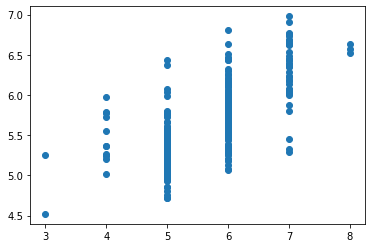

In [67]:
plt.scatter(y_test, y_pred)

In [43]:
data_3 = data_2

In [69]:
print(data_2)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [71]:
import seaborn as sns

## Quality

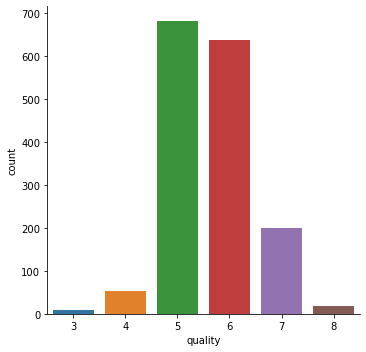

In [73]:
sns.catplot(x='quality', data=data_3, kind='count')

## Fixed Acidity

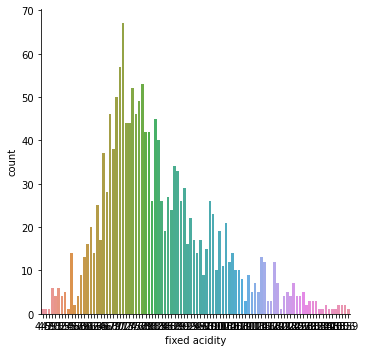

In [74]:
sns.catplot(x='fixed acidity', data=data_3, kind='count')

## volatile Acidity

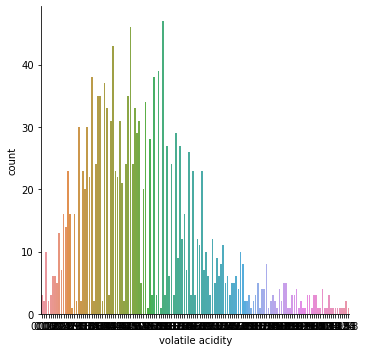

In [75]:
sns.catplot(x='volatile acidity', data=data_3, kind='count')

## Citric Acid

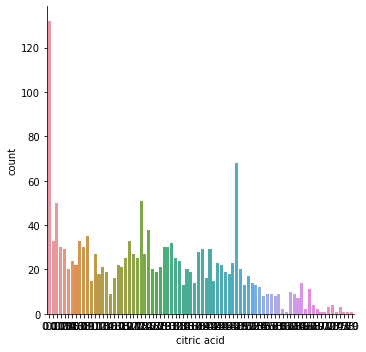

In [76]:
sns.catplot(x='citric acid', data=data_3, kind='count')

## Residual Sugar

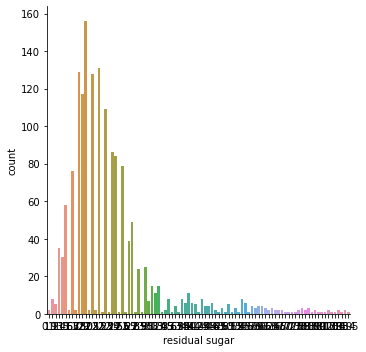

In [79]:
sns.catplot(x='residual sugar', data=data_3, kind='count')

## Chlorides

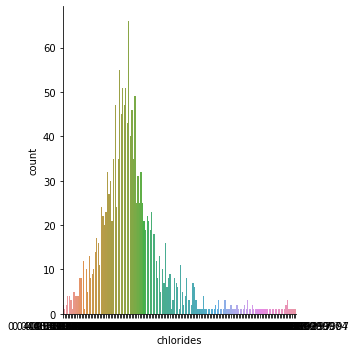

In [80]:
sns.catplot(x='chlorides', data=data_3, kind='count')

## Free Sulfur Dioxide

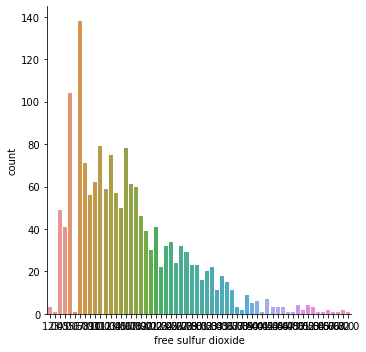

In [81]:
sns.catplot(x='free sulfur dioxide', data=data_3, kind='count')

## Total Sulfur Dioxide

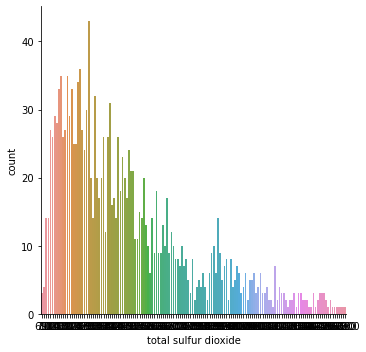

In [85]:
sns.catplot(x='total sulfur dioxide', data=data_3, kind='count')

## Density

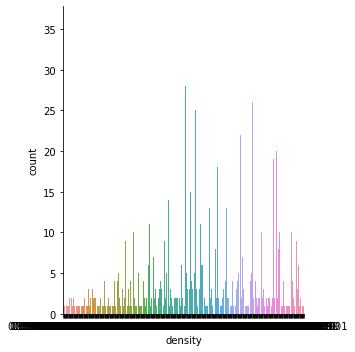

In [86]:
sns.catplot(x='density', data=data_3, kind='count')

## pH

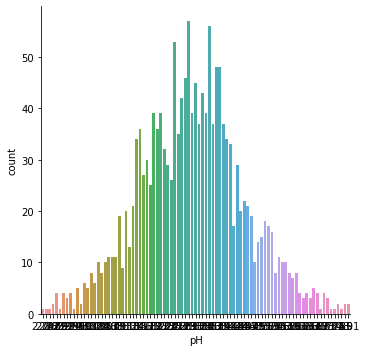

In [87]:
sns.catplot(x='pH', data=data_3, kind='count')

## Density

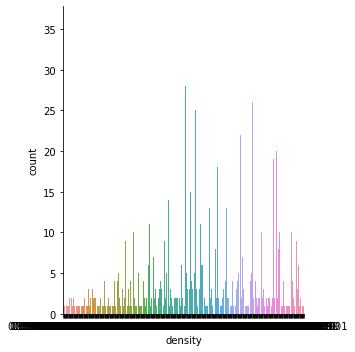

In [86]:
sns.catplot(x='density', data=data_3, kind='count')

## Sulphates

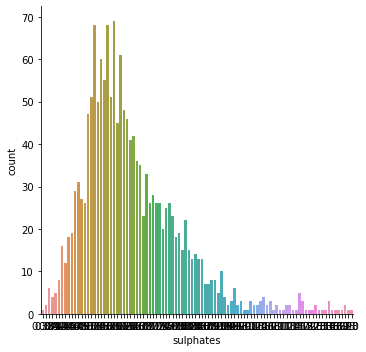

In [88]:
sns.catplot(x='sulphates', data=data_3, kind='count')

## Alcohol

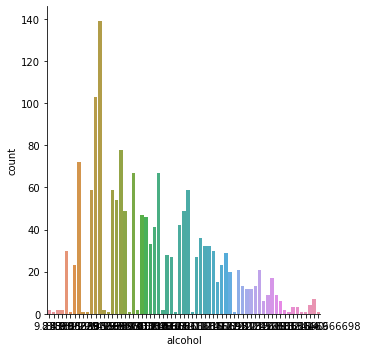

In [89]:
sns.catplot(x='alcohol', data=data_3, kind='count')

## Quality

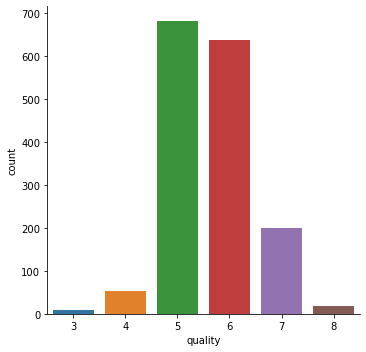

In [90]:
sns.catplot(x='quality', data=data_3, kind='count')

In [91]:
print(data_3['quality'].shape)

(1599,)


In [92]:
print(data_3['alcohol'].shape)

(1599,)


In [93]:
print(data_3['alcohol'])

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64


In [97]:
print(data_3['quality'].unique())

[5 6 7 4 8 3]


In [98]:
print(data_3['alcohol'].unique())

[ 9.4         9.8        10.          9.5        10.5         9.2
  9.9         9.1         9.3         9.          9.7        10.1
 10.6         9.6        10.8        10.3        13.1        10.2
 10.9        10.7        12.9        10.4        13.         14.
 11.5        11.4        12.4        11.         12.2        12.8
 12.6        12.5        11.7        11.3        12.3        12.
 11.9        11.8         8.7        13.3        11.2        11.6
 11.1        13.4        12.1         8.4        12.7        14.9
 13.2        13.6        13.5        10.03333333  9.55        8.5
 11.06666667  9.56666667 10.55        8.8        13.56666667 11.95
  9.95        9.23333333  9.25        9.05       10.75      ]


In [100]:
print(data_3['volatile acidity'].unique())

[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  0.35  0.975 0.26  0.87  0.18
 0.27  0.2   0.36  0.83  0.46  0.47  0.77  0.815 0.795 0.665 0.765 0.24
 0.85  0.84  0.96  0.78  0.23  0.315 0.365 0.25  0.825 0.72  0.595 0.585
 0.915 0.755 0.845 1.24  0.8   0.98  1.185 0.92  1.035 1.025 0.565 0.74
 1.115 0.865 0.875 0.965 0.91  0.89  1.01  0.305 0.395 0.12  0.86  0.295
 1.005 0.19  0.955 0.16  1.58  0.79  1.18  0.475 0.81  0.895 0.855]


In [41]:
import seaborn as sns

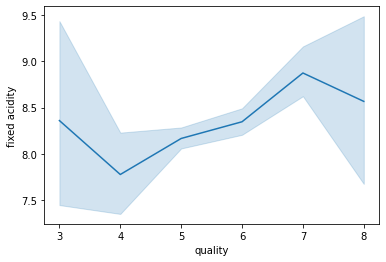

In [80]:
sns.lineplot(data_3['quality'], data_3['fixed acidity'])

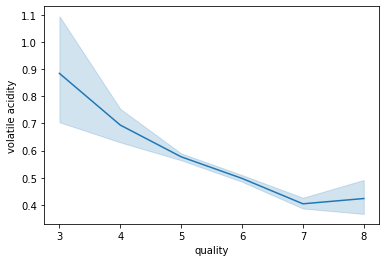

In [79]:
sns.lineplot(data_3['quality'], data_3['volatile acidity'])

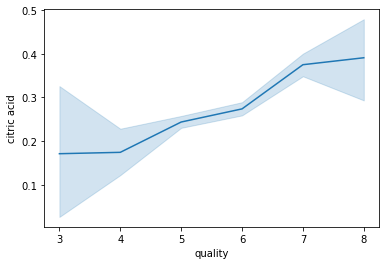

In [78]:
sns.lineplot(data_3['quality'], data_3['citric acid'])

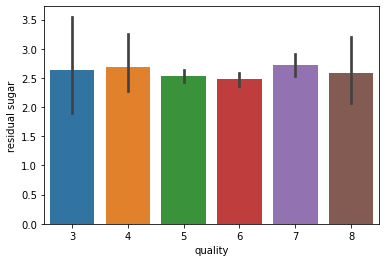

In [82]:
sns.barplot(data_3['quality'], data_3['residual sugar'])

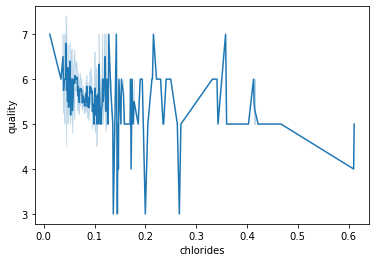

In [70]:
sns.lineplot(data_3['chlorides'], data_3['quality'])

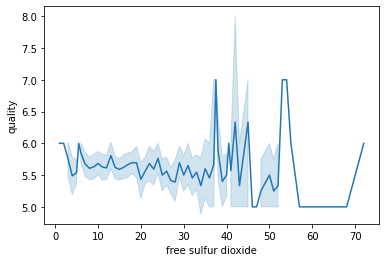

In [68]:
sns.lineplot(data_3['free sulfur dioxide'], data_3['quality'])

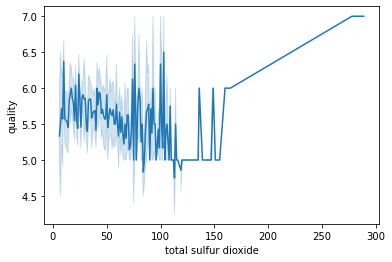

In [69]:
sns.lineplot(data_3['total sulfur dioxide'], data_3['quality'])

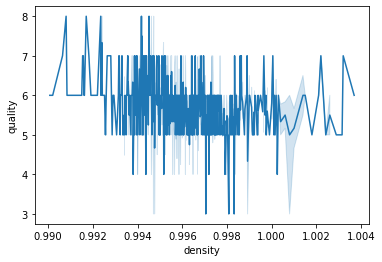

In [63]:
sns.lineplot(data_3['density'], data_3['quality'])

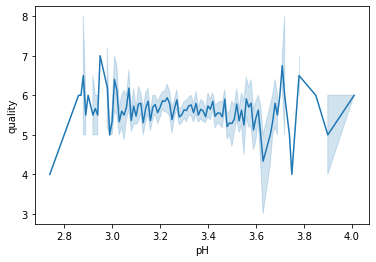

In [61]:
sns.lineplot(data_3['pH'], data_3['quality'])

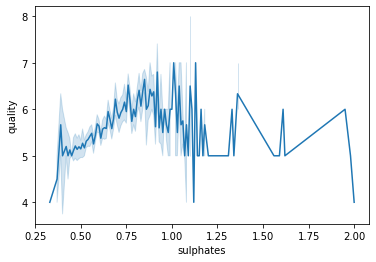

In [76]:
sns.lineplot(data_3['sulphates'], data_3['quality'])

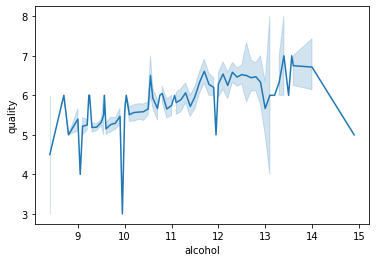

In [75]:
sns.lineplot(data_3['alcohol'], data_3['quality'])